## 词云（Word Cloud）
- 词云，又称文字云、标签云，是对文本数据中出现频率较高的“关键词”在视觉上的突出呈现，形成关键词的渲染形成类似云一样的彩色图片。视觉直观感受文本数据的主要表达意思，常见于博客、微博、文章分析等。

- 环境准备
    - pip/pip3 install wordcloud
    
    
- 构建流程
    - (1) 文本预处理
    - (2) 词频统计
    - (3) 将高频词以图片形式进行彩色渲染

In [2]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

##  参数详解 
https://www.cnblogs.com/delav/articles/7837975.html

---
- **font_path**: string  #字体路径，"字体路径+后缀名"如：font_path = '黑体.ttf'
- **width**: int (default=400) #输出的画布宽度，默认为400像素
- **height**: int (default=200) #输出的画布高度，默认为200像素
- **prefer_horizontal**: float (default=0.90) #词语水平方向排版出现的频率，默认 0.9 （所以词语垂直方向排版出现频率为 0.1 ）
- **mask**: nd-array or None (default=None) #如果参数为空，则使用二维遮罩绘制词云。如果 mask 非空，设置的宽高值将被忽略，遮罩形状被 mask 取代
- **scale**: float (default=1) #按照比例进行放大画布，如设置为1.5，则长和宽都是原来画布的1.5倍
- **min_font_size**: int (default=4) #显示的最小的字体大小
- **font_step**: int (default=1) #字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差
- **max_words**: number (default=200) #要显示的词的最大个数
- **stopwords**: set of strings or None #设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS
- **background_color**: color value (default=”black”) #背景颜色，如background_color='white',背景颜色为白色
- **max_font_size**: int or None (default=None) #显示的最大的字体大小
- **mode**: string (default=”RGB”) #当参数为“RGBA”并且background_color不为空时，背景为透明
- **relative_scaling**: float (default=.5) #词频和字体大小的关联性
- **color_func**: callable, default=None #生成新颜色的函数，如果为空，则使用 self.color_func
- **regexp**: string or None (optional) #使用正则表达式分隔输入的文本
- **collocations**: bool, default=True #是否包括两个词的搭配
- **colormap**: string or matplotlib colormap, default=”viridis” #给每个单词随机分配颜色，若指定color_func，则忽略该方法 
- **random_state**: int or None  #为每个单词返回一个PIL颜色
---

### （1）英文词云 

In [3]:
print(STOPWORDS)

{'out', 'then', "there's", 'being', 'same', "doesn't", 'between', 'cannot', 'his', 'hence', 'it', 'that', 'this', "shan't", 'in', 'however', 'how', "we're", 'you', 'themselves', 'yours', 'did', 'a', 'all', 'is', "it's", 'whom', "weren't", 'ourselves', 'they', 'be', 'own', 'else', "he'd", 'theirs', "why's", "he'll", 'so', 'during', "you'd", "you've", 'r', 'down', 'before', 'with', 'once', 'off', 'been', 'too', "mustn't", 'were', 'an', 'i', 'here', "they're", 'any', 'does', 'would', 'some', 'not', 'more', 'herself', 'was', 'of', 'yourselves', 'on', 'such', 'itself', "we'll", "when's", "let's", 'her', "where's", 'as', 'myself', "you're", "we've", "she'll", "they've", 'by', 'over', "she's", 'can', 'my', 'at', 'http', "don't", 'under', "i've", 'few', "they'd", 'our', 'com', 'she', 'we', 'when', 'otherwise', "who's", 'yourself', 'those', 'get', 'himself', 'nor', 'ours', "that's", 'up', "what's", 'to', 'should', 'ought', "didn't", 'shall', 'through', "how's", 'him', 'your', 'above', 'just', "

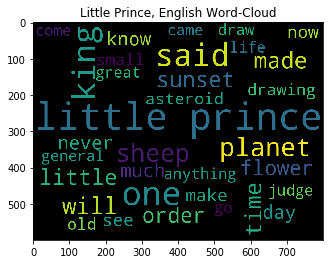

In [8]:
fig,ax=plt.subplots()

with open('data/en.txt') as f:
    text=f.read()

mycloudword=WordCloud(width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='black',
                      max_words=300, 
                      min_font_size=40, 
                      max_font_size=140,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(text)

ax.imshow(mycloudword)
#ax.axis("off") #显示坐标轴
plt.title('Little Prince, English Word-Cloud')
plt.show()

mycloudword.to_file("data/en_wordcloud.jpg")

### 2. 中文词云 & 指定形状 

In [9]:
import jieba
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/wangqingqin/anaconda3/lib/python3.7/site-packages/jieba/__init__.py", line 154, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpt_twz756' -> '/tmp/jieba.cache'
Loading model cost 0.896 seconds.
Prefix dict has been built successfully.


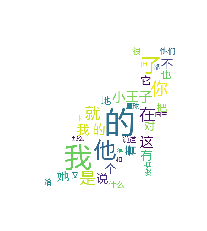

In [10]:
fig,ax=plt.subplots()

# 获取数据
with open('data/ch.txt','r') as f:
    text = f.read()
words = ' '.join(jieba.cut(text))

shape=np.array(Image.open('data/images/cat.png'))

mycloudword=WordCloud(font_path='data/Fonts/msyh.ttf', #中文字体
                      width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='white',
                      mask=shape,
                      max_words=300, 
                      min_font_size=20, 
                      max_font_size=100,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(words)

ax.imshow(mycloudword)
ax.axis("off")
plt.show()

mycloudword.to_file(r"...\ch_word_cloud.png")